In [ ]:
# import pandas as pd
import os
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = pd.read_csv("data/Eclipse.csv",sep=';')
data2 = pd.read_csv("data/Mozilla.csv",sep=';')
data3 = pd.read_csv("data/Netbeans.csv",sep=';')
data4 = pd.read_csv("data/Openoffice.csv",sep=';')
data1 = data1[['sd','bsr','pr']]
data2 = data2[['sd','bsr','pr']]
data3 = data3[['sd','bsr','pr']]
data4 = data4[['sd','bsr','pr']]


In [ ]:
# data cleaning for data2
data2.drop(data2[data2['bsr'] == '--'].index,inplace= True)
data2.drop(data2[data2['pr'] == '--'].index,inplace= True)
data2.dropna(inplace=True)
#data clearning for data4
data4.pr.replace(['P1 (highest)','P5 (lowest)'],['P1','P5'], inplace = True)
data4.bsr.replace(['Major', 'Normal', 'Blocker', 'Minor', 'Trivial', 'Critical'] , ['major','normal','blocker','minor','trivial','critical'], inplace = True)

In [ ]:

data = data1

In [ ]:
data.isna().sum()

sd     0
bsr    0
pr     0
dtype: int64

In [ ]:
data.bsr.value_counts()

bsr
normal         5560
enhancement    1621
major           566
minor           277
blocker         203
critical        195
trivial          56
Name: count, dtype: int64

In [ ]:
data.drop(data[data['bsr'] == 'S3'].index,inplace= True)
data.drop(data[data['bsr'] == 'S1'].index,inplace= True)
data.drop(data[data['bsr'] == 'S2'].index,inplace= True)
data.drop(data[data['bsr'] == 'S4'].index,inplace= True)
# normal_xtra = data[data['bsr']=='major'].iloc[:1700]
mjor_xrta = pd.concat([data[data['bsr']=='major'],data[data['bsr']=='major'],data[data['bsr']=='major']])
minor_xrta = pd.concat([data[data['bsr']=='minor'],data[data['bsr']=='minor'],data[data['bsr']=='minor'],data[data['bsr']=='minor'],data[data['bsr']=='minor'],data[data['bsr']=='minor'],data[data['bsr']=='minor']])
blocker_xrta = pd.concat([data[data['bsr']=='blocker'],data[data['bsr']=='blocker'],data[data['bsr']=='blocker'],data[data['bsr']=='blocker'],data[data['bsr']=='blocker'],data[data['bsr']=='blocker'],data[data['bsr']=='blocker']])
critical_xrta = pd.concat([data[data['bsr']=='critical'],data[data['bsr']=='critical'],data[data['bsr']=='critical'],data[data['bsr']=='critical'],data[data['bsr']=='critical'],data[data['bsr']=='critical'],data[data['bsr']=='critical']])
trivial_xrta = pd.concat([data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial'],data[data['bsr']=='trivial']],)
p4_xtra = pd.concat([data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4']])
# p4_xtra = pd.concat([p4_xtra,data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4'],data[data['pr']=='P4']])

p2_xtra = pd.concat([data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2'],data[data['pr']=='P2']])
p1_xtra = pd.concat([data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1'],data[data['pr']=='P1']])
p5_xtra = pd.concat([data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5']])
p5_xtra = pd.concat([p5_xtra,data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5'],data[data['pr']=='P5']])
# p1_xtra = data[data['pr']=='P1'].iloc[:5000]

In [ ]:
# p3_xtra.shape

In [ ]:
data = pd.concat([mjor_xrta,minor_xrta,blocker_xrta,critical_xrta,trivial_xrta,p4_xtra,p2_xtra,p1_xtra,p5_xtra,p4_xtra,p4_xtra])

In [ ]:
data.pr.value_counts()

pr
P4    17224
P3     6926
P2     2924
P1     1319
P5      863
Name: count, dtype: int64

In [ ]:
data[['normal','enhancement','P1','P2','P4']] = 0
for index ,row in data.iterrows():

    if row['bsr'] == 'normal':
        data.loc[index,"normal"] = 1

    if row['bsr'] == 'enhancement':
        data.loc[index,"enhancement"] = 1

for index , row in data.iterrows():

    if row['pr'] == 'P1':
        data.loc[index,'P1'] =1

    if row['pr'] == 'P2':
        data.loc[index,'P2'] =1

    if row['pr'] == 'P4':
        data.loc[index,'P4'] =1

In [ ]:
# binary_labels = data[['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']]
# labels = ['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']
binary_labels = data[['normal','enhancement','P1','P2','P4']]
labels = ['normal','enhancement','P1','P2','P4']

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(data['sd'], binary_labels, test_size=0.2, random_state=9)

In [ ]:
# data = data.concat([p4_xtra,p2_xtra,p1_xtra,p5_xtra])

In [ ]:
data.columns
data.sd = data.sd.astype(str)
data.head(10)

,sd,bsr,pr,normal,enhancement,P1,P2,P4
2,Add relation information to REST-API,major,P3,0,0,0,0,0
39,Eclipse Genie fails to create CQ repeatedly,major,P3,0,0,0,0,0
70,Generating autocomplete from XSD crashes Eclipse,major,P3,0,0,0,0,0
74,OpenJ9: Git doesn't work on windows nodes afte...,major,P3,0,0,0,0,0
100,[Quicksearch] Strings not externalized,major,P3,0,0,0,0,0
104,[13][quick fix] Text Block: No Quick fix to en...,major,P3,0,0,0,0,0
115,"""JRE missing"" installation page links to JDK d...",major,P3,0,0,0,0,0
119,Eclipse for PHP Developers creates shortcut na...,major,P3,0,0,0,0,0
122,Eclipse is constantly freezing,major,P3,0,0,0,0,0
151,What to do when a product-component bugs are n...,major,P3,0,0,0,0,0


# lower casing

In [ ]:
data.sd = data.sd.str.lower()
data.head()

,sd,bsr,pr,normal,enhancement,P1,P2,P4
2,add relation information to rest-api,major,P3,0,0,0,0,0
39,eclipse genie fails to create cq repeatedly,major,P3,0,0,0,0,0
70,generating autocomplete from xsd crashes eclipse,major,P3,0,0,0,0,0
74,openj9: git doesn't work on windows nodes afte...,major,P3,0,0,0,0,0
100,[quicksearch] strings not externalized,major,P3,0,0,0,0,0


# remove punctuation

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# data["sd"] = data["sd"].apply(lambda text: remove_punctuation(text))
# data.head()

# remove stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download('wordnet')
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# data["sd"] = data["sd"].apply(lambda text: remove_stopwords(text))
# data.head()

# remove frequent words

In [ ]:
from collections import Counter
cnt = Counter()

for text in data['sd'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)


[('to', 5998),
 ('in', 5089),
 ('of', 4888),
 ('on', 4659),
 ('not', 3981),
 ('the', 3500),
 ('a', 3112),
 ('for', 3053),
 ('and', 2913),
 ('is', 2585)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# data["freqwords"] = data["sd"].apply(lambda text: remove_freqwords(text))
# data.head()

# stemming

In [ ]:
from nltk.stem.porter import PorterStemmer


stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# data["text_stemmed"] = data["sd"].apply(lambda text: stem_words(text))
# data.head()

# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# data["text_lemmatized"] = data["sd"].apply(lambda text: lemmatize_words(text))
# data.head()

# remove emoji

In [ ]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [ ]:
# data['sd'] = data['sd'].apply(lambda x : remove_emoji(x))

# remove URLs

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
# data['sd']  = data['sd'].apply(lambda x: remove_urls(x))

# remove HTML tags

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [ ]:
# data['sd'] = data['sd'].apply(lambda x: remove_html(x))

# apply all together

In [ ]:
data.sd = data.sd.str.lower()
data['sd'] = data['sd'].apply(lambda x : remove_punctuation(x))
data['sd'] = data['sd'].apply(lambda x : remove_urls(x))
data['sd'] = data['sd'].apply(lambda x : remove_html(x))
data['sd'] = data['sd'].apply(lambda x : remove_emoji(x))
data['sd'] = data['sd'].apply(lambda x : lemmatize_words(x))

In [ ]:
data.iloc[0]

# pde quickfix creates invalid since tag [1,0,0,0,0,0,0,0,0,0,0,1,0,0,0]

sd             add relation information to restapi
bsr                                          major
pr                                              P3
normal                                           0
enhancement                                      0
P1                                               0
P2                                               0
P4                                               0
Name: 2, dtype: object

In [ ]:
# data[['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']] = 0
# for index ,row in data.iterrows():

#     if row['bsr'] == 'normal':
#         data.loc[index,"normal"] = 1

#     if row['bsr'] == 'enhancement':
#         data.loc[index,"enhancement"] = 1

#     if row['bsr'] == 'major':
#         data.loc[index,"major"] = 1

#     if row['bsr'] == 'minor':
#         data.loc[index,"minor"] = 1

#     if row['bsr'] == 'blocker':
#         data.loc[index,"blocker"] = 1

#     if row['bsr'] == 'critical':
#         data.loc[index,"critical"] = 1

#     if row['bsr'] == 'trivial':
#         data.loc[index,"trivial"] = 1
# for index , row in data.iterrows():

#     if row['pr'] == 'P1':
#         data.loc[index,'P1'] =1

#     if row['pr'] == 'P2':
#         data.loc[index,'P2'] =1

#     if row['pr'] == 'P3':
#         data.loc[index,'P3'] =1

#     if row['pr'] == 'P4':
#         data.loc[index,'P4'] =1

#     if row['pr'] == 'P5':
#         data.loc[index,'P5'] =1

In [ ]:
# data['P5'].value_counts()

In [ ]:
# data.bsr.value_counts()
# data.bsr =data.bsr.replace(['normal','enhancement','major','minor','blocker','critical','trivial',],[0,1,2,3,4,5,6])

In [ ]:
# data.pr.value_counts()
# data.pr = data.pr.replace(['P1','P2','P3','P4','P5'],[1,2,3,4,5])

In [ ]:
# data.pr.value_counts()

# visualization

# Split dataset

In [ ]:
# train_x , train_y , test_x , test_y = train_test_split(data['sd'],  test_size=.20, random_state=420)

# vectorizing cleaned text for modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# # binary_labels = data[['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']]
# # labels = ['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']
# binary_labels = data[['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']]
# labels = ['normal','enhancement','major','minor','blocker','critical','trivial','P1','P2','P3','P4','P5']

In [ ]:
# split dataset into training and validation set
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
# xtrain, xval, ytrain, yval = train_test_split(data['sd'], binary_labels, test_size=0.2, random_state=9)

In [ ]:
xtrain

3691    Add constructor for MDGenerateConnectionsActio...
3628    HoldingResource references in model lead to in...
4199    Freezes on ES scenario when using Lost/Found F...
4500    Can't add Physical Link in [EAB] on a PC if li...
1005    Update featured story and our footer for Eclip...
                              ...                        
3769                            wrong melodymodeller icon
7230        [GTK3.24.9] Text in Trees/Tables is overdrawn
4135      Remove references to metaclasses implementation
4858    Unable to consume capella nightly update site ...
3506             State Machine doesn't work from OA to SA
Name: sd, Length: 23404, dtype: object

In [ ]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [ ]:
max(xtrain_tfidf.toarray()[0])

0.43849677610143206

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

#Run Logistic Regrssion
logreg = LogisticRegression()
logreg_classifier = OneVsRestClassifier(logreg)

# fit model on train data
logreg_classifier.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
predictions = logreg_classifier.predict(xval_tfidf)

# evaluate performance
from sklearn.metrics import accuracy_score
print("Accuracy score for Logistic Regression:")
print(accuracy_score(yval, predictions))

Accuracy score for Logistic Regression:
0.9863294600136705


In [ ]:
predictions

array([[1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1]])

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print(classification_report(yval, predictions, target_names=binary_labels.columns))

              precision    recall  f1-score   support

      normal       0.99      1.00      0.99      2706
 enhancement       1.00      0.96      0.98       530
          P1       0.99      0.98      0.98       261
          P2       0.99      0.99      0.99       593
          P4       0.99      1.00      0.99      3465

   micro avg       0.99      1.00      0.99      7555
   macro avg       0.99      0.99      0.99      7555
weighted avg       0.99      1.00      0.99      7555
 samples avg       0.75      0.75      0.75      7555



In [ ]:
! pip install scikit-multilearn

In [ ]:
# Using Gaussian Naive Bayes
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB


# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(xtrain_tfidf, ytrain)
# predict
predictions = classifier.predict(xval_tfidf)

print("Accuracy score for Gaussian Naive Bayes:")
print(accuracy_score(yval, predictions))

print("Individual genre predictions:")
print(classification_report(yval, predictions, target_names=binary_labels.columns))

Accuracy score for Gaussian Naive Bayes:
0.9191729323308271
Individual genre predictions:
              precision    recall  f1-score   support

      normal       0.95      1.00      0.97      2706
 enhancement       0.83      1.00      0.91       530
          P1       0.99      1.00      0.99       261
          P2       0.69      1.00      0.82       593
          P4       0.96      1.00      0.98      3465

   micro avg       0.92      1.00      0.96      7555
   macro avg       0.88      1.00      0.93      7555
weighted avg       0.93      1.00      0.96      7555
 samples avg       0.73      0.76      0.74      7555



In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier , GradientBoostingClassifier , RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier , AdaBoostClassifier


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_ConfusionMetrix(confusion_matrix):
    # Class names
    # Flatten the confusion matrix to 2D for visualization
    confusion_matrix_flat = confusion_matrix.reshape(5, 4)

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(confusion_matrix_flat, annot=True, fmt="d", cmap="YlGnBu", cbar=False)

    # Adjust the labels
    plt.xlabel('Component')
    plt.ylabel('Class')
    plt.title('Confusion Matrix Heatmap')

    # Adding custom tick labels
    tick_labels = ['TP', 'FP', 'FN', 'TN']

    # Set x-axis labels
    plt.xticks([0.5, 1.5, 2.5, 3.5], tick_labels, rotation=0)

    # Set y-axis labels
    # y_labels = ['normal', 'enhancement', 'major', 'minor', 'blocker', 'critical', 'trivial', 'P1', 'P2', 'P3', 'P4', 'P5']
    y_labels = ['normal', 'enhancement', 'P1', 'P2',  'P4' ]

    plt.yticks(np.arange(0.5, len(y_labels)), y_labels, rotation=0)

    plt.show()

In [ ]:
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))])

LR_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('lr_model', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))])

SVM_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('svm_model', OneVsRestClassifier(LinearSVC(), n_jobs=-1))])

DT_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('svm_model', OneVsRestClassifier(DecisionTreeClassifier(), n_jobs=-1))])

RF_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('svm_model', OneVsRestClassifier(RandomForestClassifier(), n_jobs=-1))])

# ExtraTreesClassifier
ETC_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('ETC_model', OneVsRestClassifier(ExtraTreesClassifier(), n_jobs=-1))])
#BaggingClassifier
BAGGING_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('ETC_model', OneVsRestClassifier(BaggingClassifier(), n_jobs=-1))])
# AdaBoostClassifier
ADA_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('ADA_model', OneVsRestClassifier(AdaBoostClassifier(), n_jobs=-1))])
#GradientBoostingClassifier
GBC_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('GBC_model', OneVsRestClassifier(GradientBoostingClassifier(), n_jobs=-1))])
#HistGradientBoostingClassifier
HGB_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('HGB_model', OneVsRestClassifier(HistGradientBoostingClassifier(), n_jobs=-1))])

# Adaboost with randomforest

ADA_NF_pipeline = ADA_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                       ('ADA_NF_model', OneVsRestClassifier(AdaBoostClassifier(estimator=RandomForestClassifier())))])


In [ ]:
def plot_roc_curve(test_features, predict_prob):
    fpr, tpr, thresholds = roc_curve(test_features, predict_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for toxic comments')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend(labels)

In [ ]:
def run_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_lbls)
    predictions = pipeline.predict(test_feats)
    pred_proba = pipeline.predict_proba(test_feats)
    # print('roc_auc: ', roc_auc_score(test_lbls, pred_proba))
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('precision:',precision_score(test_lbls, predictions,average='micro'))
    print('recall:', recall_score(test_lbls, predictions,average='micro'))
    print('f1 score', f1_score(test_lbls, predictions,average='micro'))
    print('confusion matrices: ')
    confusion_matrix = multilabel_confusion_matrix(test_lbls, predictions)
    create_ConfusionMetrix(confusion_matrix)
    print('classification_report: ')
    print(classification_report(test_lbls, predictions, target_names=labels))

In [ ]:
def run_ensemble_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    print(type(train_feats))
    train_feats = np.array(train_feats) #train_feats.toarray()
    # train_feats = train_feats.values
    train_lbls = train_lbls.to_numpy()
    # train_lbls = train_lbls.values
    pipeline.fit(train_feats, train_lbls)
    predictions = pipeline.predict(test_feats)
    pred_proba = pipeline.predict_proba(test_feats)
    # print('roc_auc: ', roc_auc_score(test_lbls, pred_proba))
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('precision:',precision_score(test_lbls, predictions,average='micro'))
    print('recall:', recall_score(test_lbls, predictions,average='micro'))
    print('f1 score', f1_score(test_lbls, predictions,average='micro'))
    print('confusion matrices: ')
    print('confusion matrices: ')
    confusion_matrix = multilabel_confusion_matrix(test_lbls, predictions)
    create_ConfusionMetrix(confusion_matrix)
    print('classification_report: ')
    print(classification_report(test_lbls, predictions, target_names=labels))

In [ ]:
def run_SVM_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_lbls)
    predictions = pipeline.predict(test_feats)
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('confusion matrices: ')
    print('confusion matrices: ')
    confusion_matrix = multilabel_confusion_matrix(test_lbls, predictions)
    create_ConfusionMetrix(confusion_matrix)
    print('classification_report: ')
    print(classification_report(test_lbls, predictions, target_names=labels))

In [ ]:
def plot_pipeline_roc_curve(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    for label in labels:
        pipeline.fit(train_feats, train_set[label])
        pred_proba = pipeline.predict_proba(test_feats)[:,1]
        plot_roc_curve(test_lbls[label], pred_proba)

<class 'pandas.core.series.Series'>
accuracy:  0.9958988380041012
precision: 0.9984089101034208
recall: 0.9966909331568498
f1 score 0.9975491819566802
confusion matrices: 
confusion matrices: 


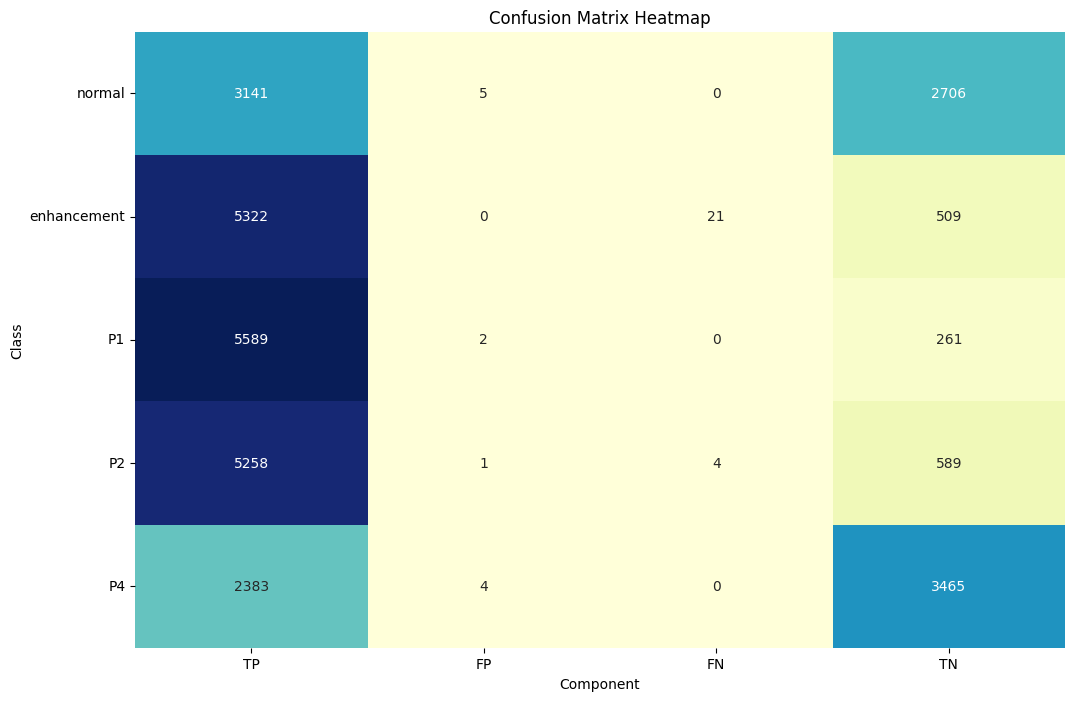

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      2706
 enhancement       1.00      0.96      0.98       530
          P1       0.99      1.00      1.00       261
          P2       1.00      0.99      1.00       593
          P4       1.00      1.00      1.00      3465

   micro avg       1.00      1.00      1.00      7555
   macro avg       1.00      0.99      0.99      7555
weighted avg       1.00      1.00      1.00      7555
 samples avg       0.75      0.75      0.75      7555



In [ ]:
# ADA_NF_pipeline
run_ensemble_pipeline(ADA_NF_pipeline, xtrain, ytrain, xval, yval)

<!--  -->

<class 'pandas.core.series.Series'>
accuracy:  0.67053998632946
precision: 0.8522012578616353
recall: 0.8250165453342158
f1 score 0.8383885937184746
confusion matrices: 
confusion matrices: 


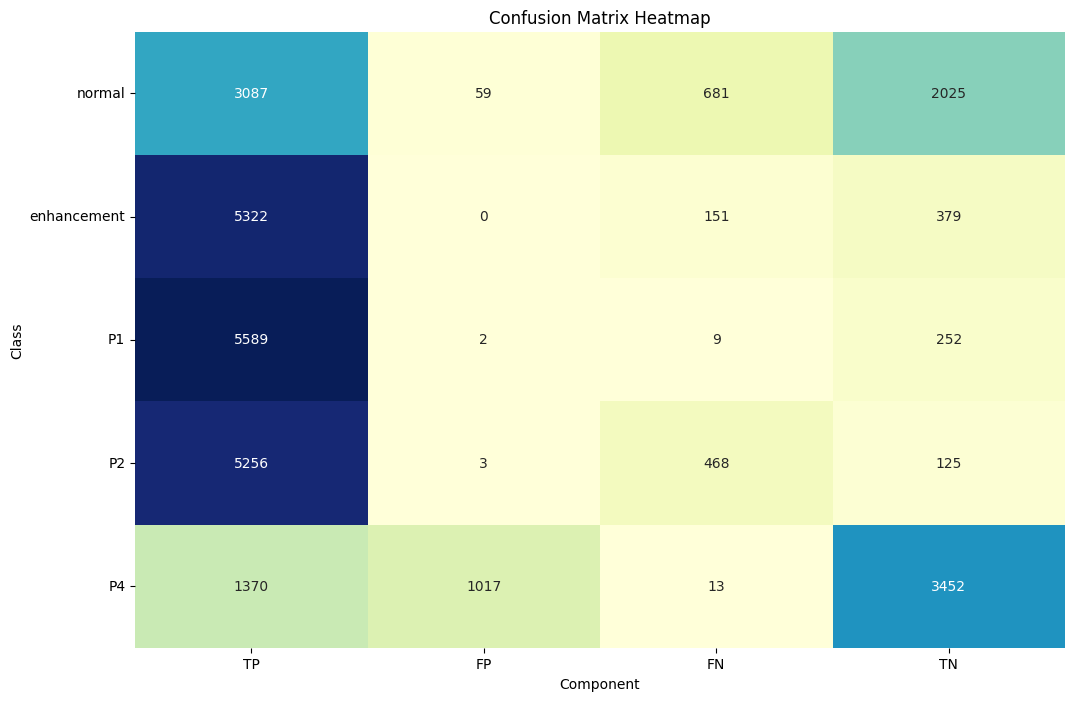

classification_report: 
              precision    recall  f1-score   support

      normal       0.97      0.75      0.85      2706
 enhancement       1.00      0.72      0.83       530
          P1       0.99      0.97      0.98       261
          P2       0.98      0.21      0.35       593
          P4       0.77      1.00      0.87      3465

   micro avg       0.85      0.83      0.84      7555
   macro avg       0.94      0.73      0.77      7555
weighted avg       0.88      0.83      0.82      7555
 samples avg       0.67      0.62      0.63      7555



In [ ]:
# GBC_pipeline
run_ensemble_pipeline(GBC_pipeline, xtrain, ytrain, xval, yval)

In [ ]:
run_ensemble_pipeline(ADA_pipeline, xtrain, ytrain, xval, yval)

<class 'pandas.core.series.Series'>


<class 'pandas.core.series.Series'>


/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/pyt

accuracy:  0.9973346660003332
precision: 0.9986673330001666
recall: 0.9986673330001666
f1 score 0.9986673330001666
confusion matrices: 
confusion matrices: 


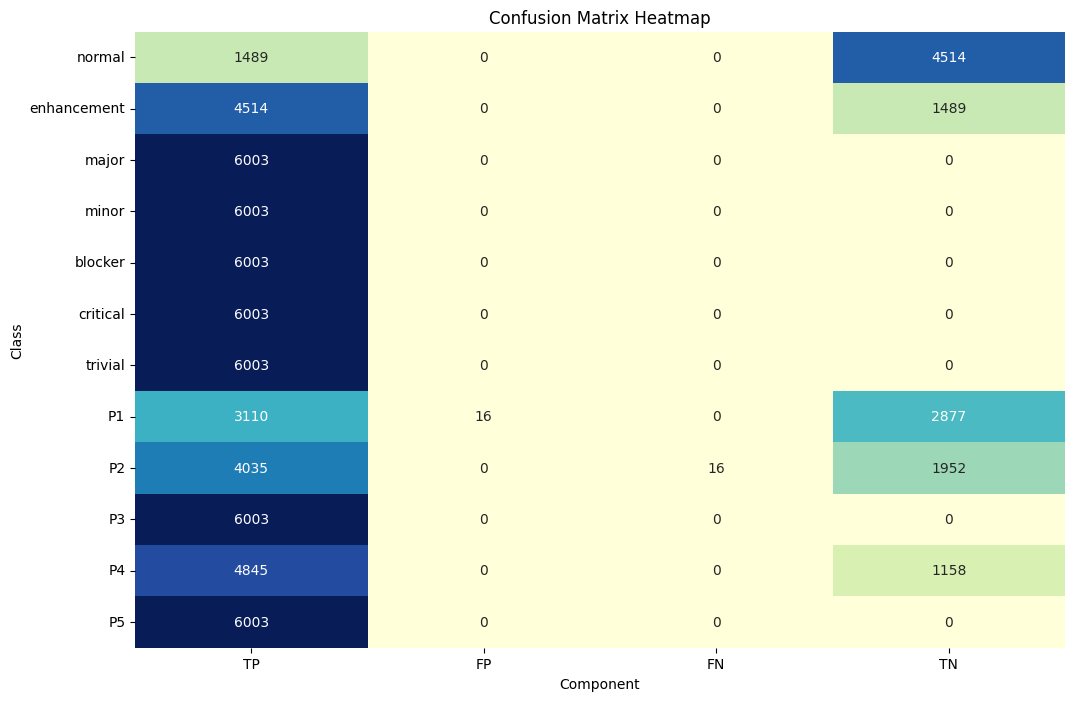

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      1.00      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
# BAGGING_pipeline
run_ensemble_pipeline(BAGGING_pipeline, xtrain,ytrain,xval, yval)

<class 'pandas.core.series.Series'>


/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/pyt

accuracy:  0.9973346660003332
precision: 0.9986673330001666
recall: 0.9986673330001666
f1 score 0.9986673330001666
confusion matrices: 
confusion matrices: 


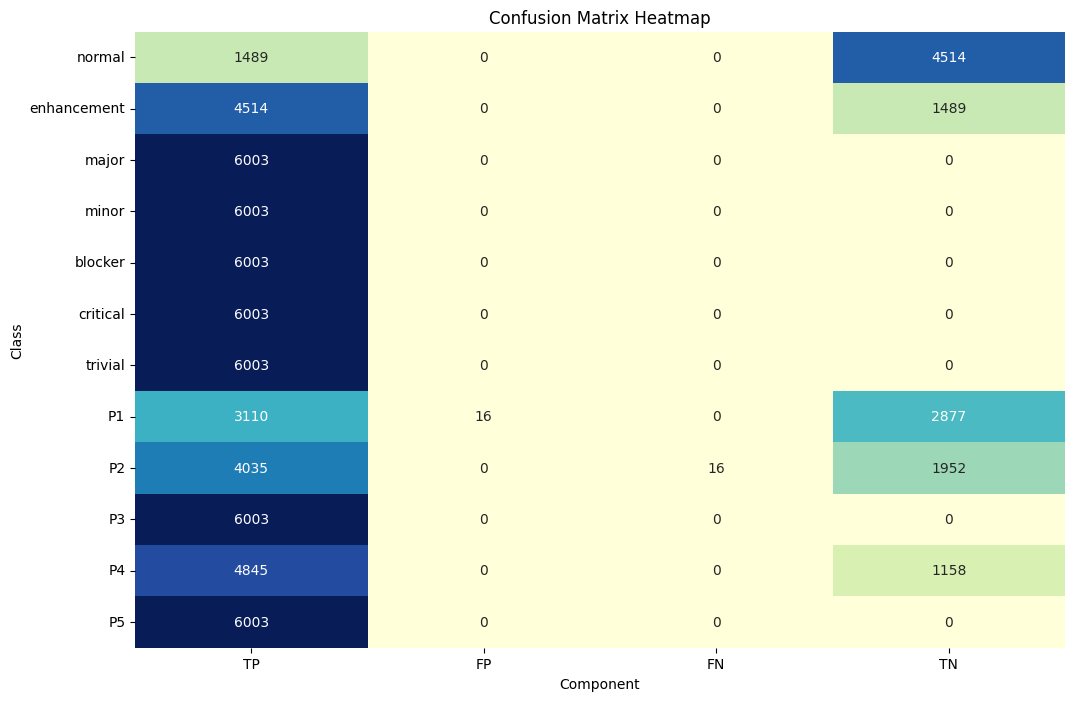

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      1.00      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
run_ensemble_pipeline(ETC_pipeline, xtrain,ytrain,xval, yval)

<class 'pandas.core.series.Series'>


/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/pyt

accuracy:  0.9973346660003332
precision: 0.9986673330001666
recall: 0.9986673330001666
f1 score 0.9986673330001666
confusion matrices: 
confusion matrices: 


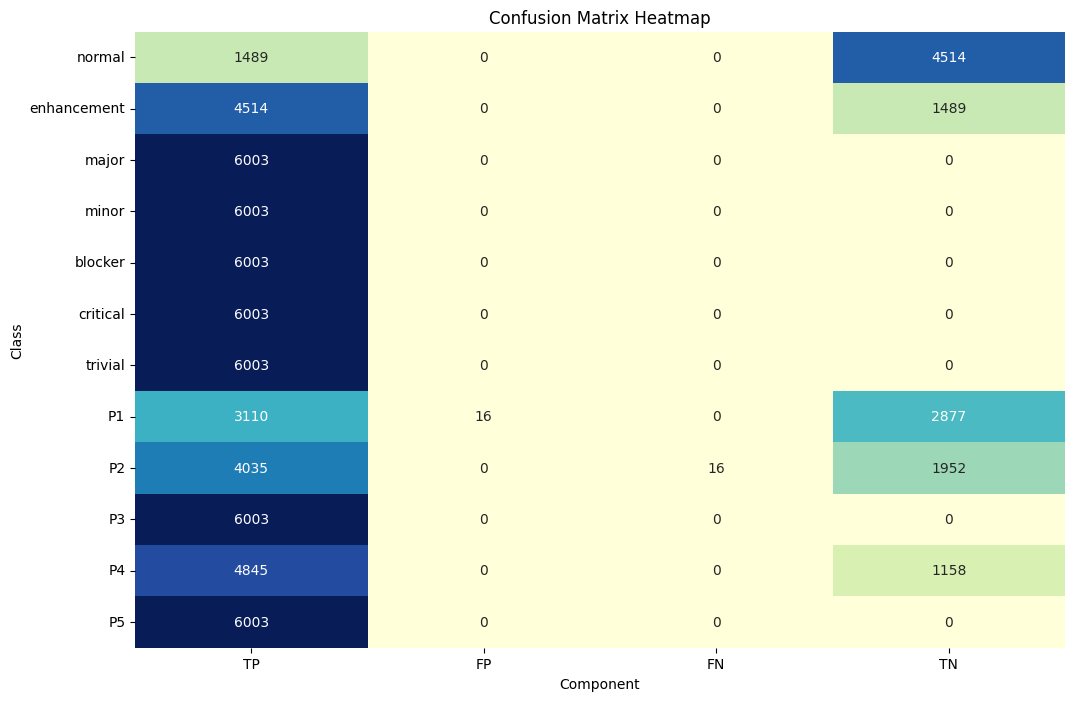

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      1.00      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
run_ensemble_pipeline(RF_pipeline,xtrain,ytrain,xval,yval)

accuracy:  0.9461935698817258
precision: 0.9879619496590623
recall: 0.9775112443778111
f1 score 0.9827088130625916
confusion matrices: 


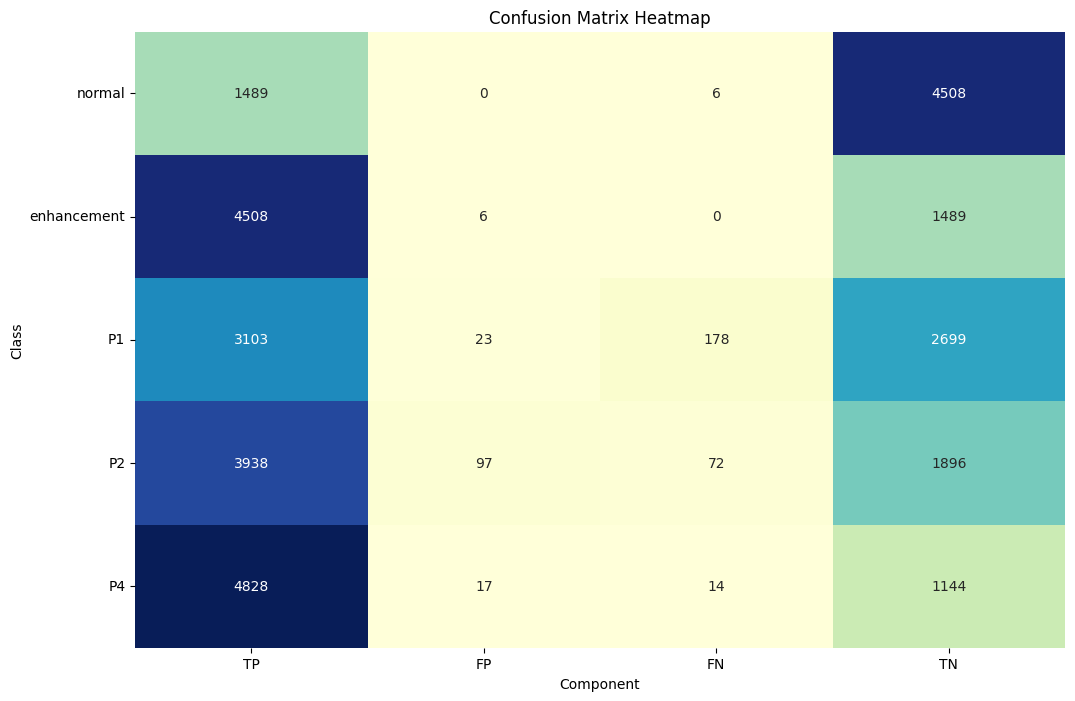

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
          P1       0.99      0.94      0.96      2877
          P2       0.95      0.96      0.96      1968
          P4       0.99      0.99      0.99      1158

   micro avg       0.99      0.98      0.98     12006
   macro avg       0.98      0.98      0.98     12006
weighted avg       0.99      0.98      0.98     12006
 samples avg       0.99      0.98      0.98     12006



In [ ]:
run_pipeline(NB_pipeline, xtrain, ytrain, xval, yval)

/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/pyt

accuracy:  0.9955022488755623
precision: 0.9986661108795332
recall: 0.9977511244377811
f1 score 0.9982084079830007
confusion matrices: 


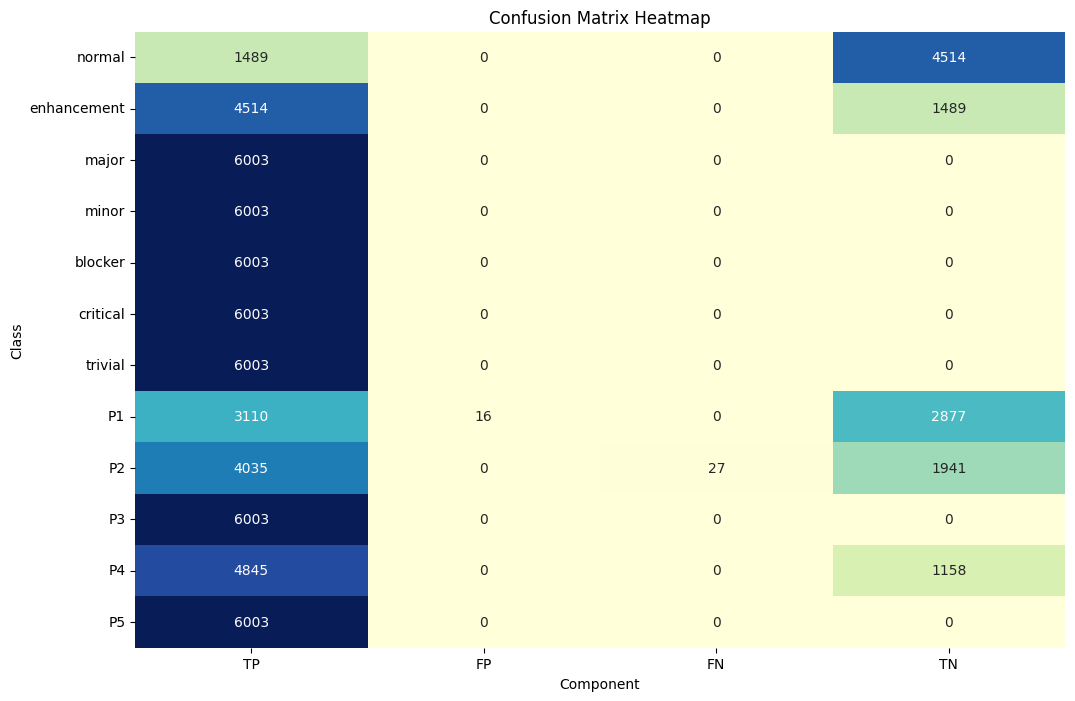

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      0.99      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
run_pipeline(LR_pipeline, xtrain, ytrain, xval, yval)

/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/

accuracy:  0.9973346660003332
confusion matrices: 
confusion matrices: 


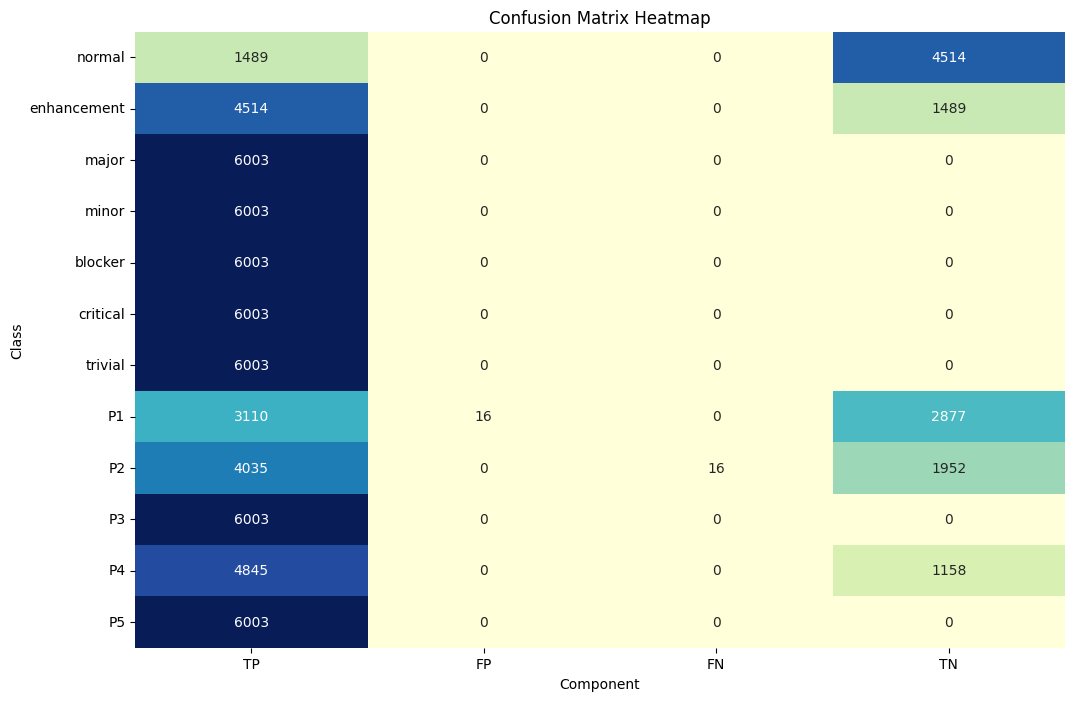

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      1.00      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
run_SVM_pipeline(SVM_pipeline, xtrain, ytrain, xval, yval)

/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/python3.10/site-packages/sklearn/multiclass.py:90: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/home/srv/bug_report/bug_r/lib/pyt

accuracy:  0.9973346660003332
precision: 0.9986673330001666
recall: 0.9986673330001666
f1 score 0.9986673330001666
confusion matrices: 


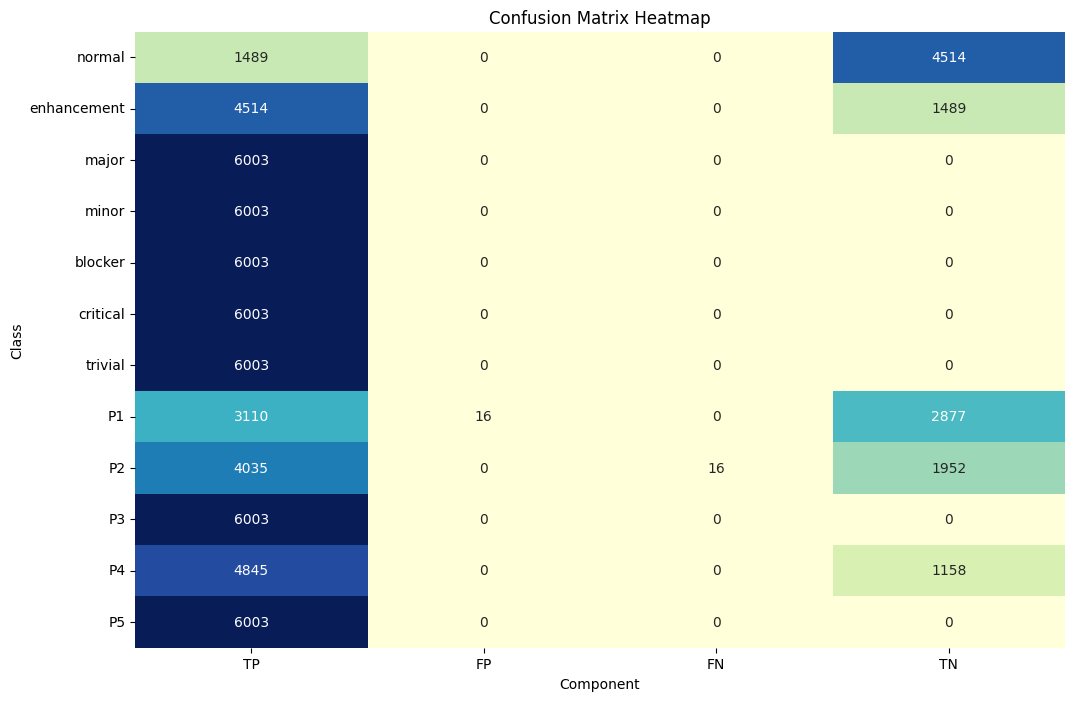

classification_report: 
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4514
 enhancement       1.00      1.00      1.00      1489
       major       0.00      0.00      0.00         0
       minor       0.00      0.00      0.00         0
     blocker       0.00      0.00      0.00         0
    critical       0.00      0.00      0.00         0
     trivial       0.00      0.00      0.00         0
          P1       0.99      1.00      1.00      2877
          P2       1.00      0.99      1.00      1968
          P3       0.00      0.00      0.00         0
          P4       1.00      1.00      1.00      1158
          P5       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00     12006
   macro avg       0.42      0.42      0.42     12006
weighted avg       1.00      1.00      1.00     12006
 samples avg       1.00      1.00      1.00     12006



In [ ]:
run_pipeline(DT_pipeline, xtrain, ytrain, xval, yval)